In [4]:
%run -i ../functions/load_packages.ipynb

# n_30 = pypsa.Network("../../pypsa-earth/networks/elec_s_30.nc")
# n_elec = pypsa.Network("../../pypsa-earth/networks/elec.nc")

regions_onshore = gpd.read_file("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/shapes/gadm_shapes.geojson")
regions_offshore = gpd.read_file("../../sandbox-cs/pypsa-earth-sec/pypsa-earth/resources/shapes/offshore_shapes.geojson")
# substations_OSMclean_path = "../../pypsa-earth/resources/osm/clean/all_clean_substations.geojson"

# lines_OSMclean_path = "../../pypsa-earth/resources/osm/clean/all_clean_lines.geojson"
industry_capacities = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industrial_database.csv"

industry_share_ap = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industry_sector_ratios_AP_2030.csv"
industry_share_nz = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industry_sector_ratios_NZ_2030.csv"
industry_share_bs = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industry_sector_ratios_BS_2030.csv"

industry_prod_ap  = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_AP.csv"
industry_prod_nz  = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_NZ.csv"
industry_prod_bs  = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_BS.csv"


etotals_ap = "../../sandbox-cs/pypsa-earth-sec/data/energy_totals_AP_2030.csv"
etotals_nz = "../../sandbox-cs/pypsa-earth-sec/data/energy_totals_NZ_2030.csv"
etotals_bs = "../../sandbox-cs/pypsa-earth-sec/data/energy_totals_BS_2030.csv"

#2050 data
industry_share_ap_50 = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industry_sector_ratios_AP_2050.csv"
industry_share_nz_50 = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industry_sector_ratios_NZ_2050.csv"
industry_share_bs_50 = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industry_sector_ratios_BS_2050.csv"

industry_prod_ap_50  = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_AP.csv"
industry_prod_nz_50  = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_NZ.csv"
industry_prod_bs_50  = "../../sandbox-cs/pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_BS.csv"

etotals_ap_50 = "../../sandbox-cs/pypsa-earth-sec/data/energy_totals_AP_2050.csv"
etotals_nz_50 = "../../sandbox-cs/pypsa-earth-sec/data/energy_totals_NZ_2050.csv"
etotals_bs_50 = "../../sandbox-cs/pypsa-earth-sec/data/energy_totals_BS_2050.csv"

In [2]:
df = pd.read_csv(industry_capacities, keep_default_na=False,
        na_values=[""])

geometry = gpd.points_from_xy(df.y, df.x)
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,country,x,y,technology,capacity,unit,quality,company,location,start year,Latest renovation year,Source,Comments,geometry
0,NA,-22.189381,17.303929,Industry Steel Secondary EAF,1500.0,Kt/yr,actual,Hyron Steel Namibia plant,Khomas,Proposed,NaN,Tracker Map - Global Energy Monitor,NaN,POINT (17.30393 -22.18938)
1,NA,-17.777380,15.763281,Industry Steel Secondary EAF,3000.0,Kt/yr,actual,Groot Suisse Oshana steel plant,"Ongwediva, Oshana",2022,NaN,Tracker Map - Global Energy Monitor,NaN,POINT (15.76328 -17.77738)
2,NA,-26.659553,15.085991,Industry Chemical Ammonia Renewable,350.0,Kt/yr,actual,Hyphen Green Hydrogen project,Erongo,Proposed,NaN,Daures Green Village (gh2namibia.com),NaN,POINT (15.08599 -26.65955)
3,NA,-20.419305,16.676885,Industry NMM Cement,500.0,Kt/yr,actual,Whale Rock Cement (Pty) Ltd,Otjiwarongo,2018,NaN,Cheetah Cement to re-enter local market with massive investment - ...,NaN,POINT (16.67688 -20.41931)
4,NA,-19.520701,17.448800,Industry NMM Cement,1000.0,Kt/yr,actual,Ohorongo Cement,Otavi,2010,NaN,About Us - Ohorongo Cement (PTY) Ltd (ohorongo-cement.com),NaN,POINT (17.44880 -19.52070)


[-2.91992e+00  1.50004e+03  3.00000e+03] 0    1500.00
1    3000.00
2     350.00
3     500.00
4    1000.00
5       0.08
6       2.10
7       3.30
Name: capacity, dtype: float64
[1.50000e+00 1.50004e+03 3.00000e+03] 0    1500.00
1    3000.00
2     350.00
3     500.00
4    1000.00
5       0.08
6       2.10
7       3.30
Name: capacity, dtype: float64


NameError: name 'mlines' is not defined

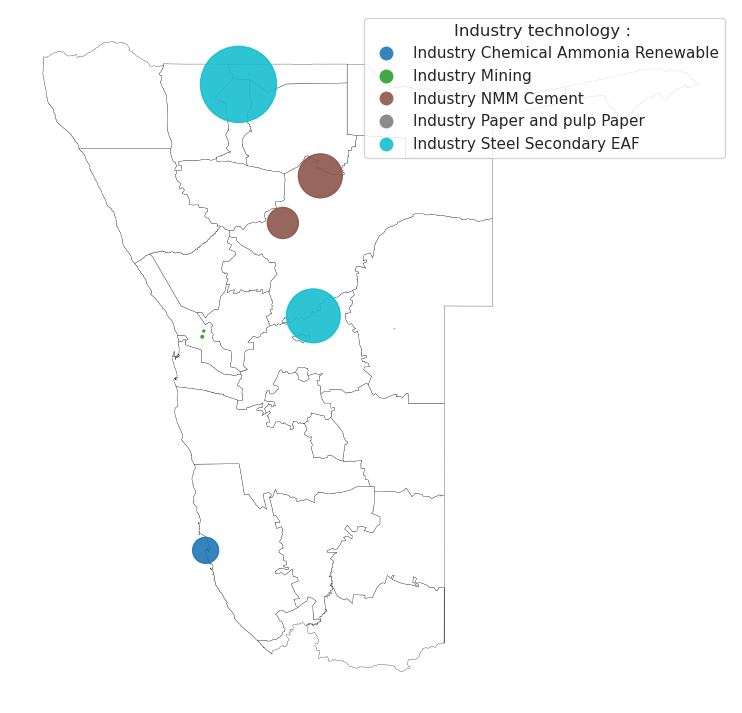

In [3]:
#plot gens
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
regions_onshore.to_crs(epsg=4326).plot(
                                        ax=ax, 
                                        color="white", 
                                        edgecolor="black", 
                                        linewidth=0.2)
markersize = geo_df['capacity']

geo_df.to_crs(epsg=4326).plot(
                                ax=ax,
                                column='technology',
                                alpha=0.9,
                                markersize=markersize, legend=True,
                                legend_kwds={'title': "Industry technology : ",
                                'frameon' : 'False'}
                                )
ax.set_axis_off()    

# need to add existing legend back
leg1 = ax.get_legend()

# some bins to indicate size in legend
_, bins = pd.cut(markersize, bins=2, precision=2, retbins=True)
print(bins, markersize)
bins[0] = 1.5
print(bins, markersize)
# create second legend
ax.add_artist(
    ax.legend(
        handles=[
            mlines.Line2D(
                [],
                [],
                color="black",
                lw=0,
                marker="o",
                markersize=np.sqrt(b),
                label=str(int(b)),
            )
            for i, b in enumerate(bins)
        ],
        loc=4,
        handletextpad=3.0,
        labelspacing=3,
        ncol=1,
        title="Capacity Kt/yr",
        title_fontsize=13,
        fontsize=12,
        frameon=False,
    )
)
# restore original legend
ax.add_artist(leg1)

Demand scenario,Ambitious Plans (AP) 2030,Net Zero (NZ) 2030,Ambitious Plans (AP) 2050,Net Zero (NZ) 2050
Industry Steel Primary DRI,1275000,1275000,1894583,1894583
Industry Steel Secondary EAF,2550000,2550000,3789166,3789166
Industry Steel Other,1,1,1,1
Industry Chemical Other,1,1,1,1
Industry NMM Cement,739477,718349,863632,837852
Industry NMM Other,1,1,1,1
Industry Food and tobacco,1,1,1,1
Industry Construction,1,1,1,1
Industry Mining,1,1,1,1
Industry Machinery,1,1,1,1


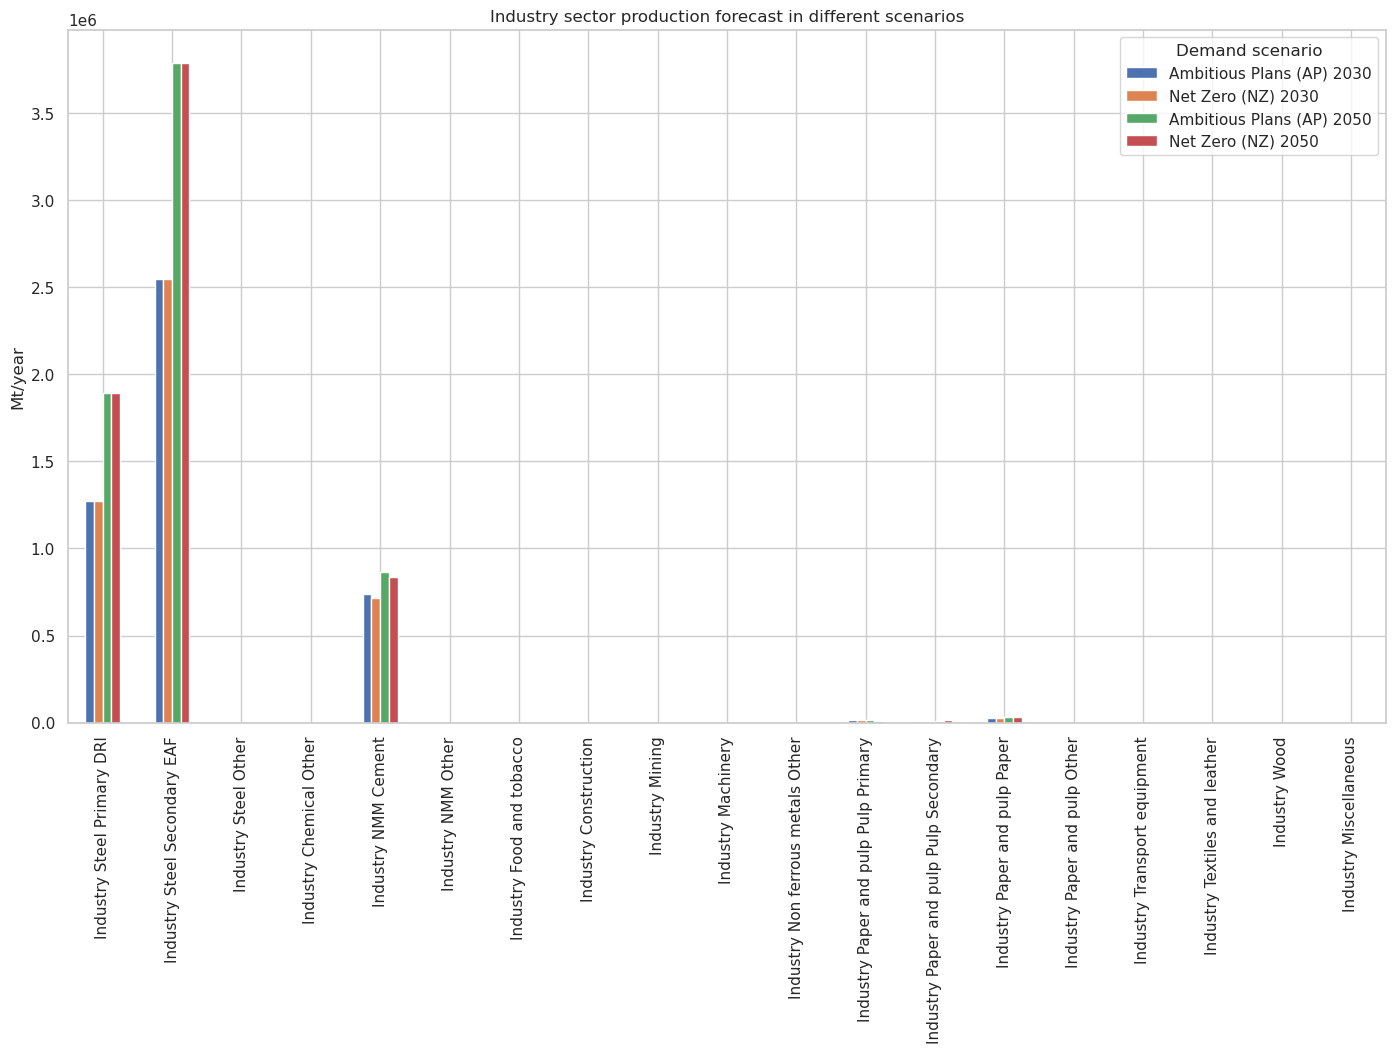

In [4]:
li = []
df=[]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
df1 = pd.read_csv(industry_prod_ap, keep_default_na=False,na_values=[""])
df1["Demand scenario"] = "Ambitious Plans (AP) 2030"
li.append(df1)
df2 = pd.read_csv(industry_prod_nz, keep_default_na=False,na_values=[""])
df2["Demand scenario"] = "Net Zero (NZ) 2030"
li.append(df2)
# df3 = pd.read_csv(industry_prod_bs, keep_default_na=False,na_values=[""])
# df3["Demand scenario"] = "Base Line (BS) 2030"
# li.append(df3)

df4 = pd.read_csv(industry_prod_ap_50, keep_default_na=False,na_values=[""])
df4["Demand scenario"] = "Ambitious Plans (AP) 2050"
li.append(df4)
df5 = pd.read_csv(industry_prod_nz_50, keep_default_na=False,na_values=[""])
df5["Demand scenario"] = "Net Zero (NZ) 2050"
li.append(df5)
# df6 = pd.read_csv(industry_prod_bs_50, keep_default_na=False,na_values=[""])
# df6["Demand scenario"] = "Base line (BS) 2050"
# li.append(df6)

frame = pd.concat(li, axis=0, ignore_index=True)

df = frame.drop(['Mt/year'], axis=1)
df = df.set_index('Demand scenario')
df = df.transpose()
df= df.loc[(df!=0).any(axis=1)]
df.plot(kind="bar", title= "Industry sector production forecast in different scenarios", ylabel = "Mt/year", ax=ax)
# df.plot.bar(x='scenario', rot=1, title='Industrial production demand for 2030', figsize=(15,10), fontsize=12)
df

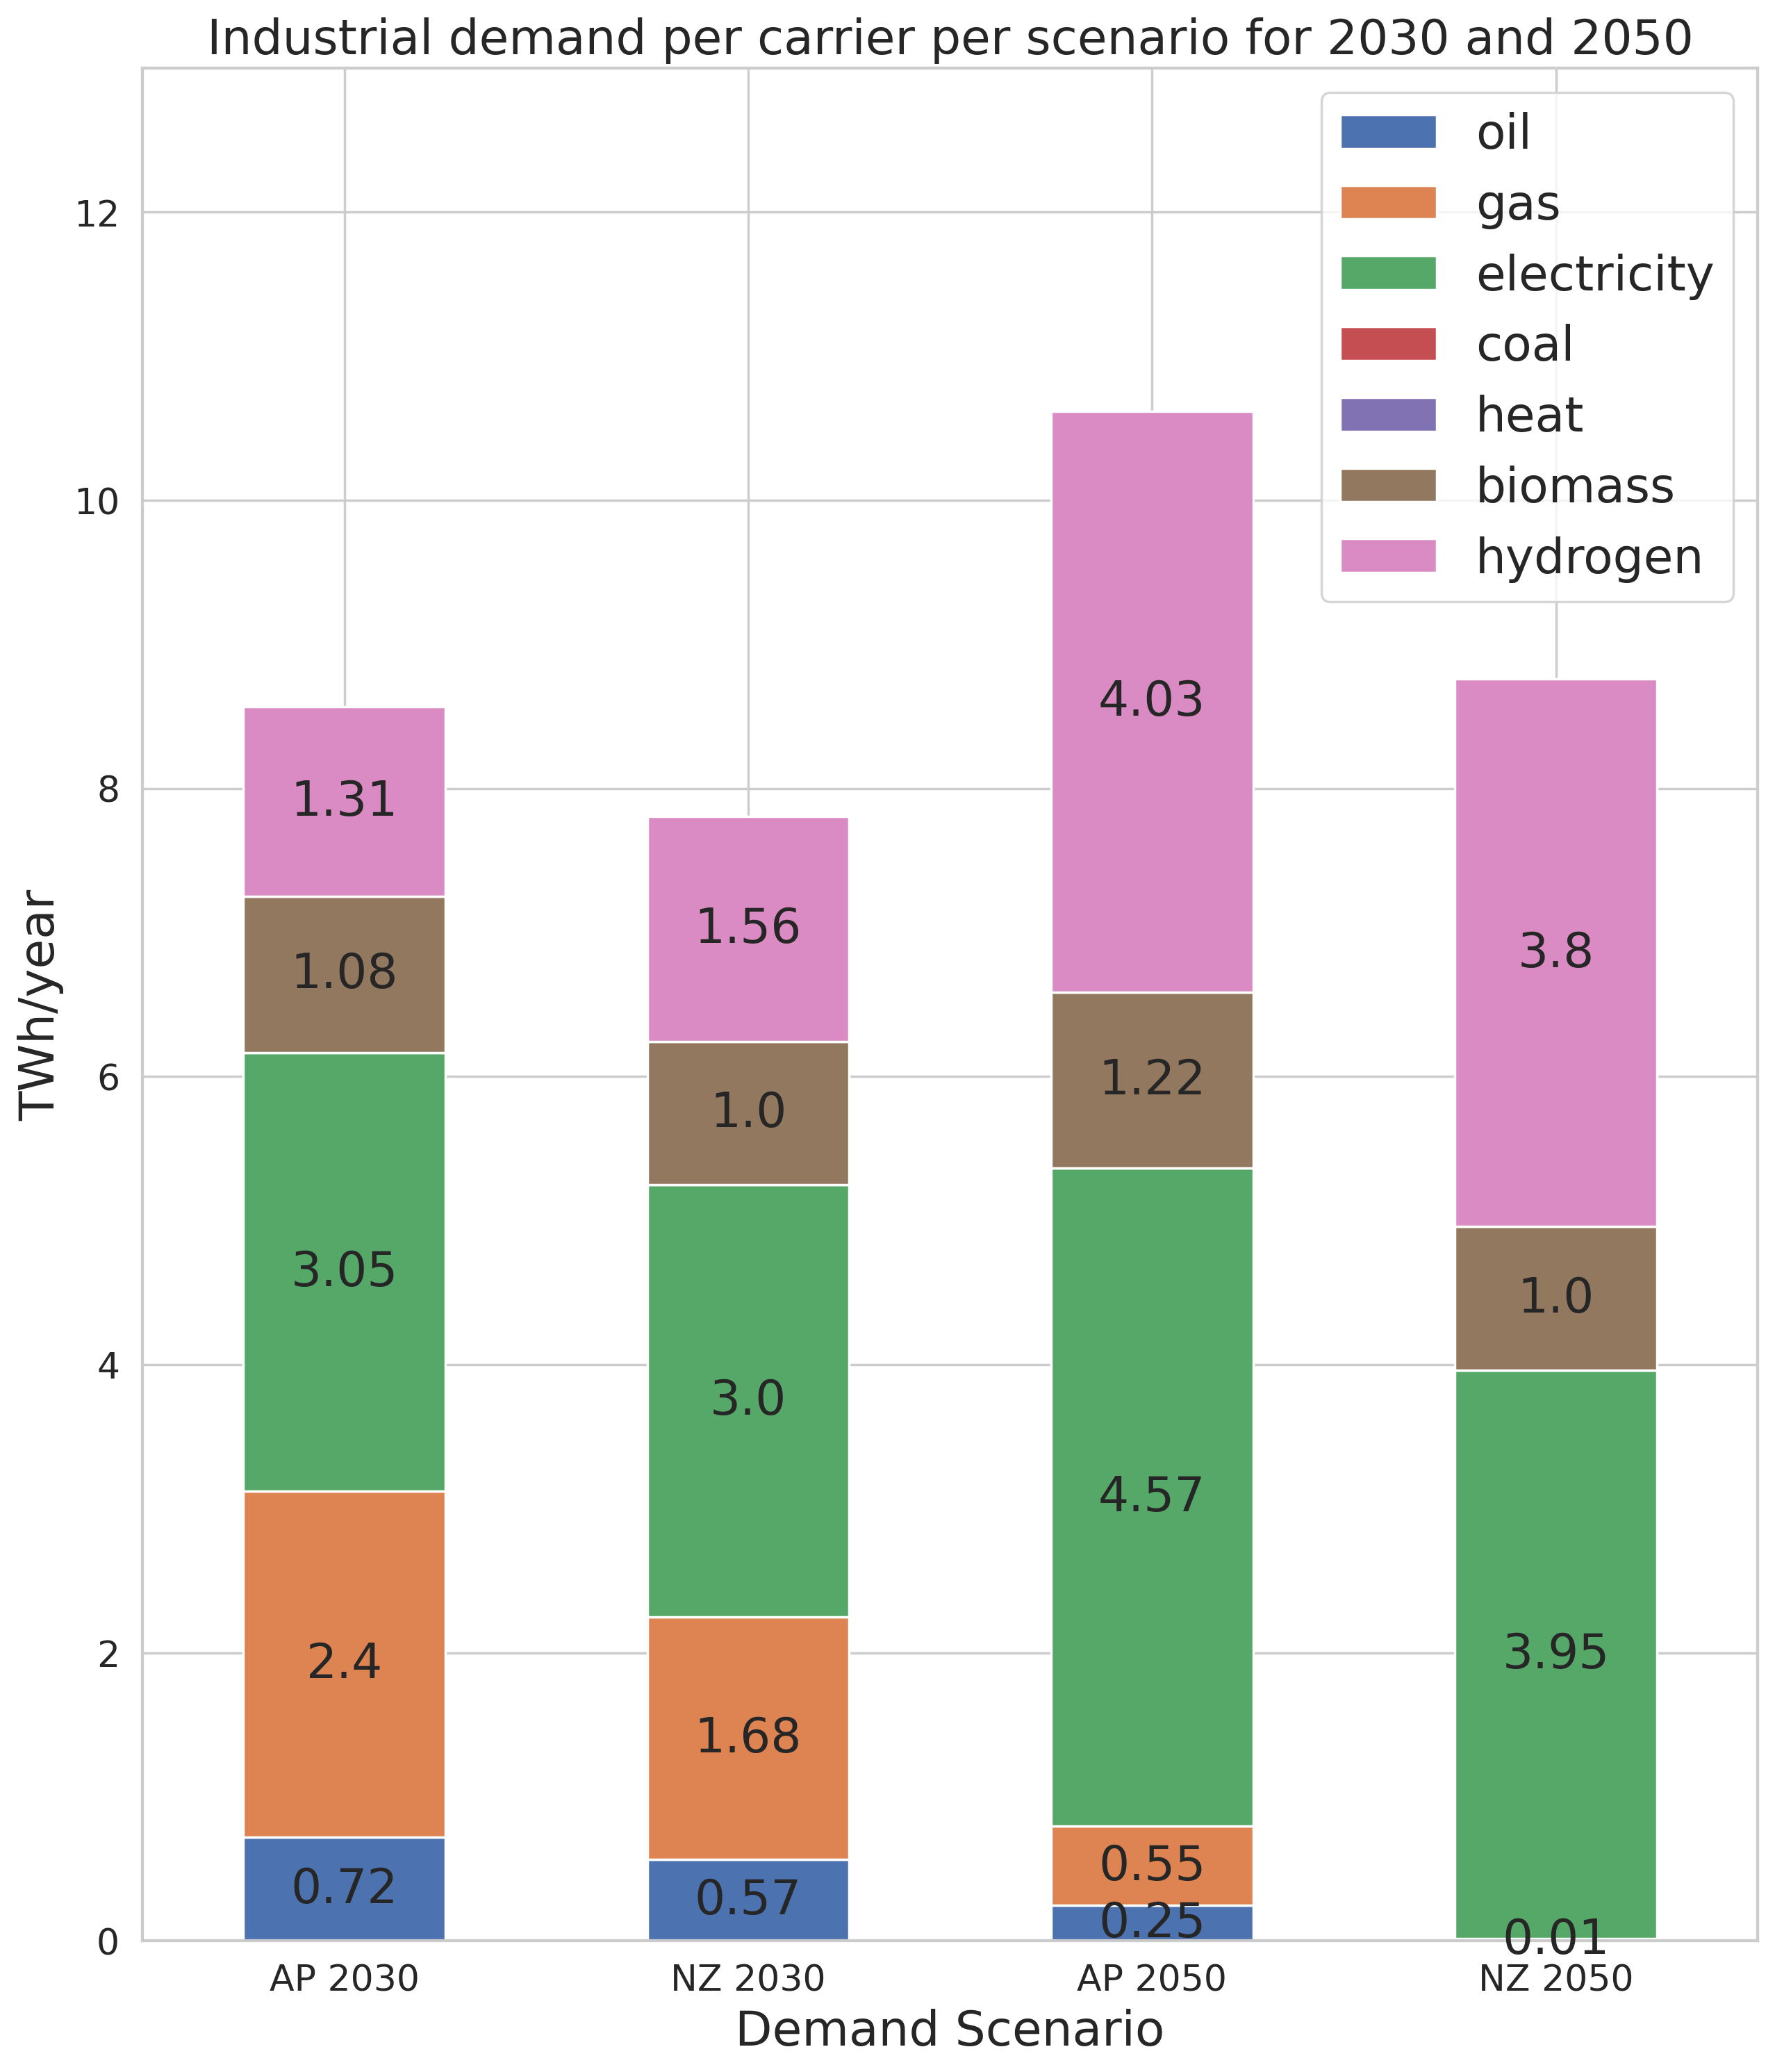

In [7]:
 
# li.append(df2)
#df = pd.concat(li, axis=0, ignore_index=False)
#df = df.drop(['Demand scenario'], axis=1)
# #df = df.set_index('Demand scenario')
# #df 
# #df.groupby('carrier')['Demand scenario'].plot(legend=True)
#add DataFrames to subplots
#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])
#df.plot.bar(x='carrier', rot=1, title='Industrial production demand for 2030', figsize=(15,10), fontsize=12)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 14)
fig.set_dpi(250)
ax.legend(fontsize=14)
li=[]

df1 = pd.read_csv(industry_share_ap, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_ap, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)*1e-6
df3['scenario']="AP 2030"
li.append(df3)

df1 = pd.read_csv(industry_share_nz, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_nz, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)*1e-6
df3['scenario']="NZ 2030"
li.append(df3)

# df1 = pd.read_csv(industry_share_bs, keep_default_na=False,na_values=[""])
# df1 = df1.set_index("carrier")
# df1 = df1.drop("process emission")
# df2 = pd.read_csv(industry_prod_bs, keep_default_na=False,na_values=[""])
# df2.drop(['Mt/year'], axis=1, inplace=True)
# df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

# #     # final energy consumption per node and industry (TWh/a)
# df3 = df2.dot(df1.T)
# df3.index=["BS 2030"]
# li.append(df3)

df1 = pd.read_csv(industry_share_ap_50, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_ap_50, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)*1e-6
df3['scenario']="AP 2050"
li.append(df3)



df1 = pd.read_csv(industry_share_nz_50, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_nz_50, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)*1e-6
df3['scenario']="NZ 2050"
li.append(df3)

# df1 = pd.read_csv(industry_share_bs_50, keep_default_na=False,na_values=[""])
# df1 = df1.set_index("carrier")
# df1 = df1.drop("process emission")
# df2 = pd.read_csv(industry_prod_bs_50, keep_default_na=False,na_values=[""])
# df2.drop(['Mt/year'], axis=1, inplace=True)
# df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

# #     # final energy consumption per node and industry (TWh/a)
# df3 = df2.dot(df1.T)
# df3.index=["BS 2050"]
# li.append(df3)

frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.set_index('scenario')
# df = frame.drop(['Mt/year'], axis=1)
# df = df.set_index('Demand scenario')
# df = df.transpose()
# df= df.loc[(df!=0).any(axis=1)]
ax = frame.plot(kind="bar",stacked = True,title= "Industrial demand per carrier per scenario for 2030 and 2050", rot=0,ax=ax, fontsize = 15)
ax.title.set_size(20)
ax.legend(fontsize=20)
ax.set_xlabel("Demand Scenario", fontsize=20)
ax.set_ylabel("TWh/year", fontsize=20)
ax.set_ylim(0,13)
for c in ax.containers:
        # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height().round(2) if v.get_height().round(2) > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=20)

<AxesSubplot:title={'center':'Energy carrier sectoral ratios in 2030 : Net Zero (NZ)'}, ylabel='Ratio'>

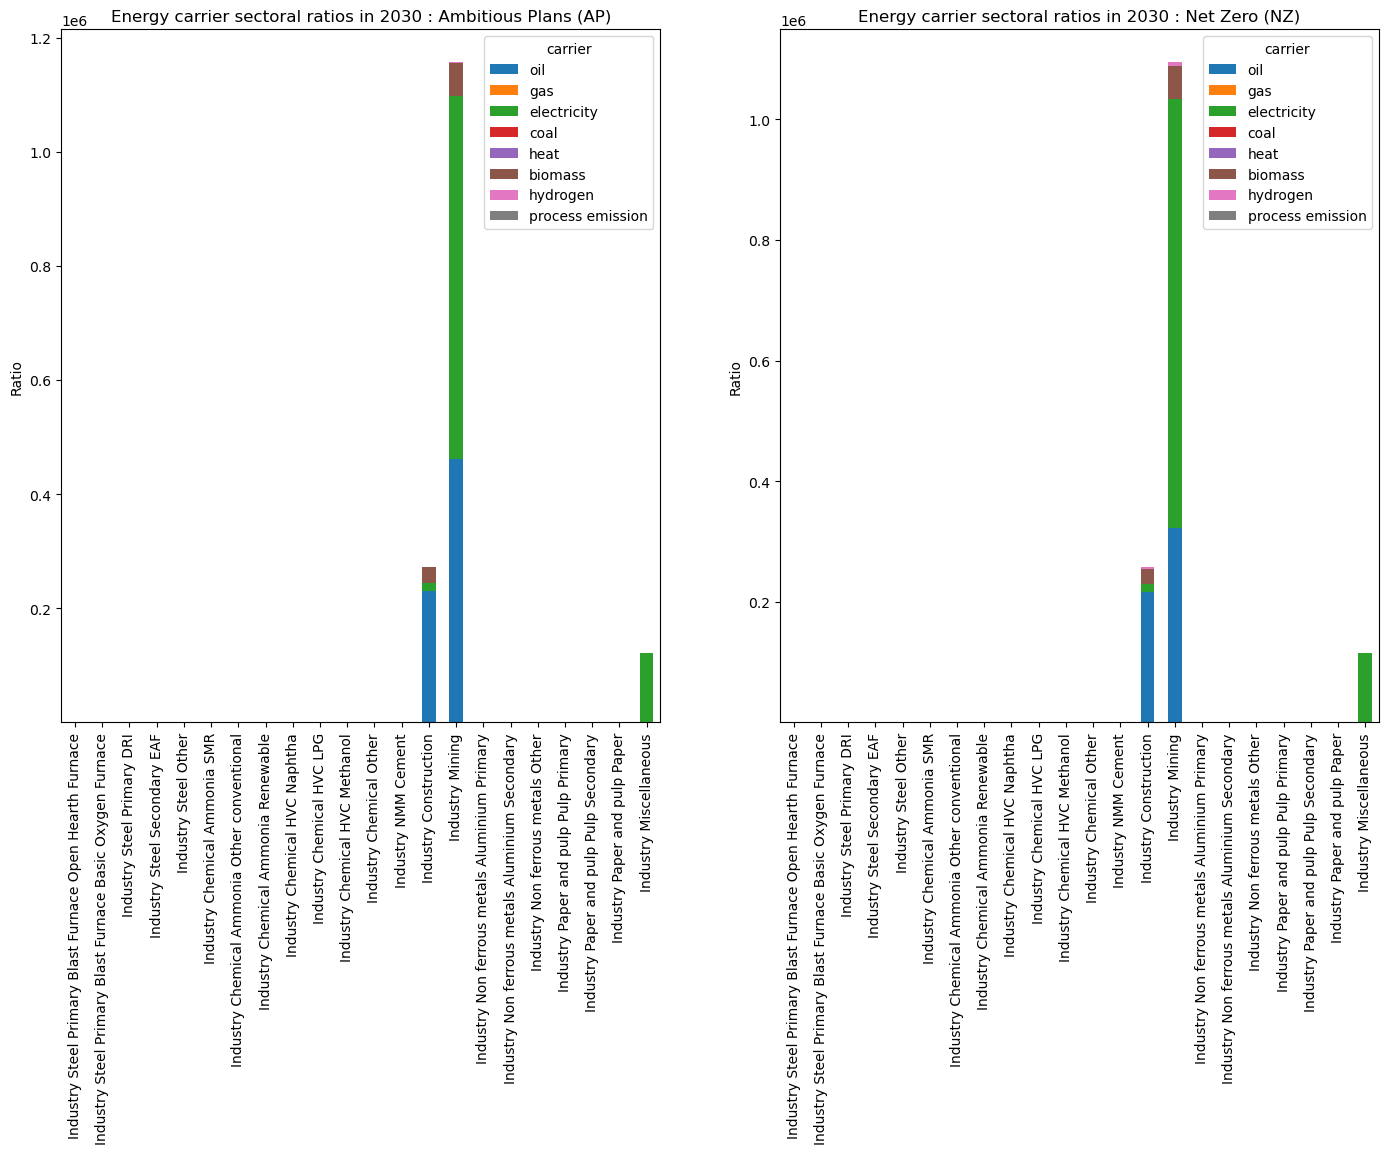

In [ ]:
#define subplot layout
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17, 9)

df1 = pd.read_csv(industry_share_ap, keep_default_na=False,na_values=[""])

df1 = df1.set_index('carrier')
df1 = df1.transpose()
df1= df1.loc[(df1!=0).any(axis=1)]

df1.plot(kind="bar", stacked = True, ax=ax[0], title= "Energy carrier sectoral ratios in 2030 : Ambitious Plans (AP)", ylabel = "Ratio")

df2 = pd.read_csv(industry_share_nz, keep_default_na=False,na_values=[""])
df2 = df2.set_index('carrier')
df2 = df2.transpose()
df2= df2.loc[(df2!=0).any(axis=1)]

df2.plot(kind="bar", stacked = True, ax=ax[1], title= "Energy carrier sectoral ratios in 2030 : Net Zero (NZ)", ylabel = "Ratio")

<AxesSubplot:title={'center':'Energy carrier sectoral ratios in 2050 : Net Zero (NZ)'}, ylabel='Ratio'>

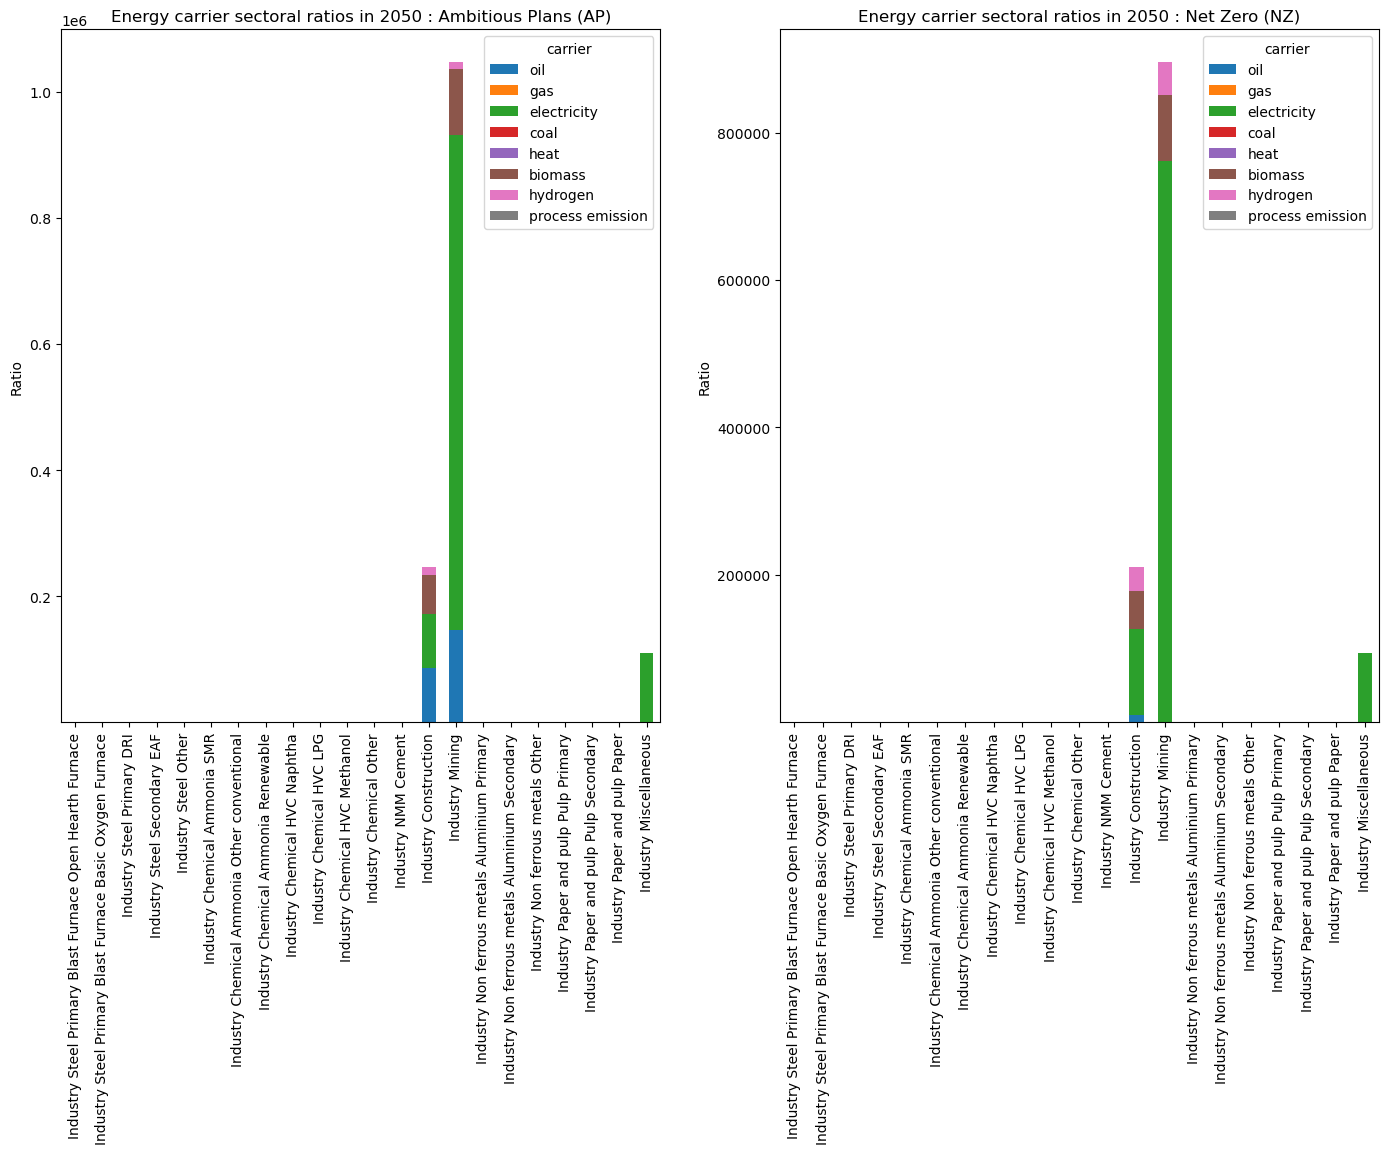

In [ ]:
#2050 data
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17, 9)

df3 = pd.read_csv(industry_share_ap_50, keep_default_na=False,na_values=[""])
df3 = df3.set_index('carrier')
df3 = df3.transpose()
df3= df3.loc[(df3!=0).any(axis=1)]

df3.plot(kind="bar", stacked = True, ax=ax[0], title= "Energy carrier sectoral ratios in 2050 : Ambitious Plans (AP)", ylabel = "Ratio")
df4 = pd.read_csv(industry_share_nz_50, keep_default_na=False,na_values=[""])
df4 = df4.set_index('carrier')
df4 = df4.transpose()
df4= df4.loc[(df4!=0).any(axis=1)]

df4.plot(kind="bar", stacked = True, ax=ax[1], title= "Energy carrier sectoral ratios in 2050 : Net Zero (NZ)", ylabel = "Ratio")


In [12]:
df1 = pd.read_csv(etotals_ap, keep_default_na=False,na_values=[""])
df1

,country,total residential space,electricity residential space,total residential water,electricity residential water,total residential cooking,electricity residential cooking,total residential,electricity residential,derived heat residential,thermal uses residential,total services space,electricity services space,total services water,electricity services water,total services cooking,electricity services cooking,total services,No electricity services,derived heat services,thermal uses services,total agriculture electricity,total agriculture heat,total agriculture machinery,total agriculture,total road,electricity road,total two-wheel,total passenger cars,electricity passenger cars,total other road passenger,electricity other road passenger,total light duty road freight,electricity light duty road freight,total heavy duty road freight,total rail,electricity rail,total rail passenger,electricity rail passenger,total rail freight,electricity rail freight,total aviation passenger,total aviation freight,total domestic aviation passenger,total international aviation passenger,total domestic aviation freight,total international aviation freight,total domestic aviation,total international aviation,total domestic navigation,district heat share,total international navigation,services electricity,agriculture electricity,agriculture oil,residential oil,residential biomass,residential gas,services biomass,services oil,residential heat oil,residential heat biomass,residential heat gas,services gas
0,NA,0.85,0.0,0.56,0.0,NaN,NaN,NaN,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.5,0.42,NaN,0.0,0.04,1.54,2.81,0.02,1.21,0.0,0.0,0.02,0.0,1.39,0.0,0.01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Demand scenario,Ambitious Plans (AP) 2030,Net Zero (NZ) 2030,Base Line (BS) 2030,Ambitious Plans (AP) 2050,Net Zero (NZ) 2050,Base Line (BS) 2050
total road,8.85,8.85,8.85,13.81,8.57,13.81
electricity residential,0.88,0.90,0.88,2.54,2.39,2.54
agriculture electricity,0.53,1.57,0.53,2.08,1.97,1.99
agriculture oil,4.77,2.24,4.77,1.66,0.45,4.31
residential heat biomass,1.39,1.22,1.39,1.56,0.92,1.56
residential biomass,1.21,1.09,1.21,1.15,0.81,1.15


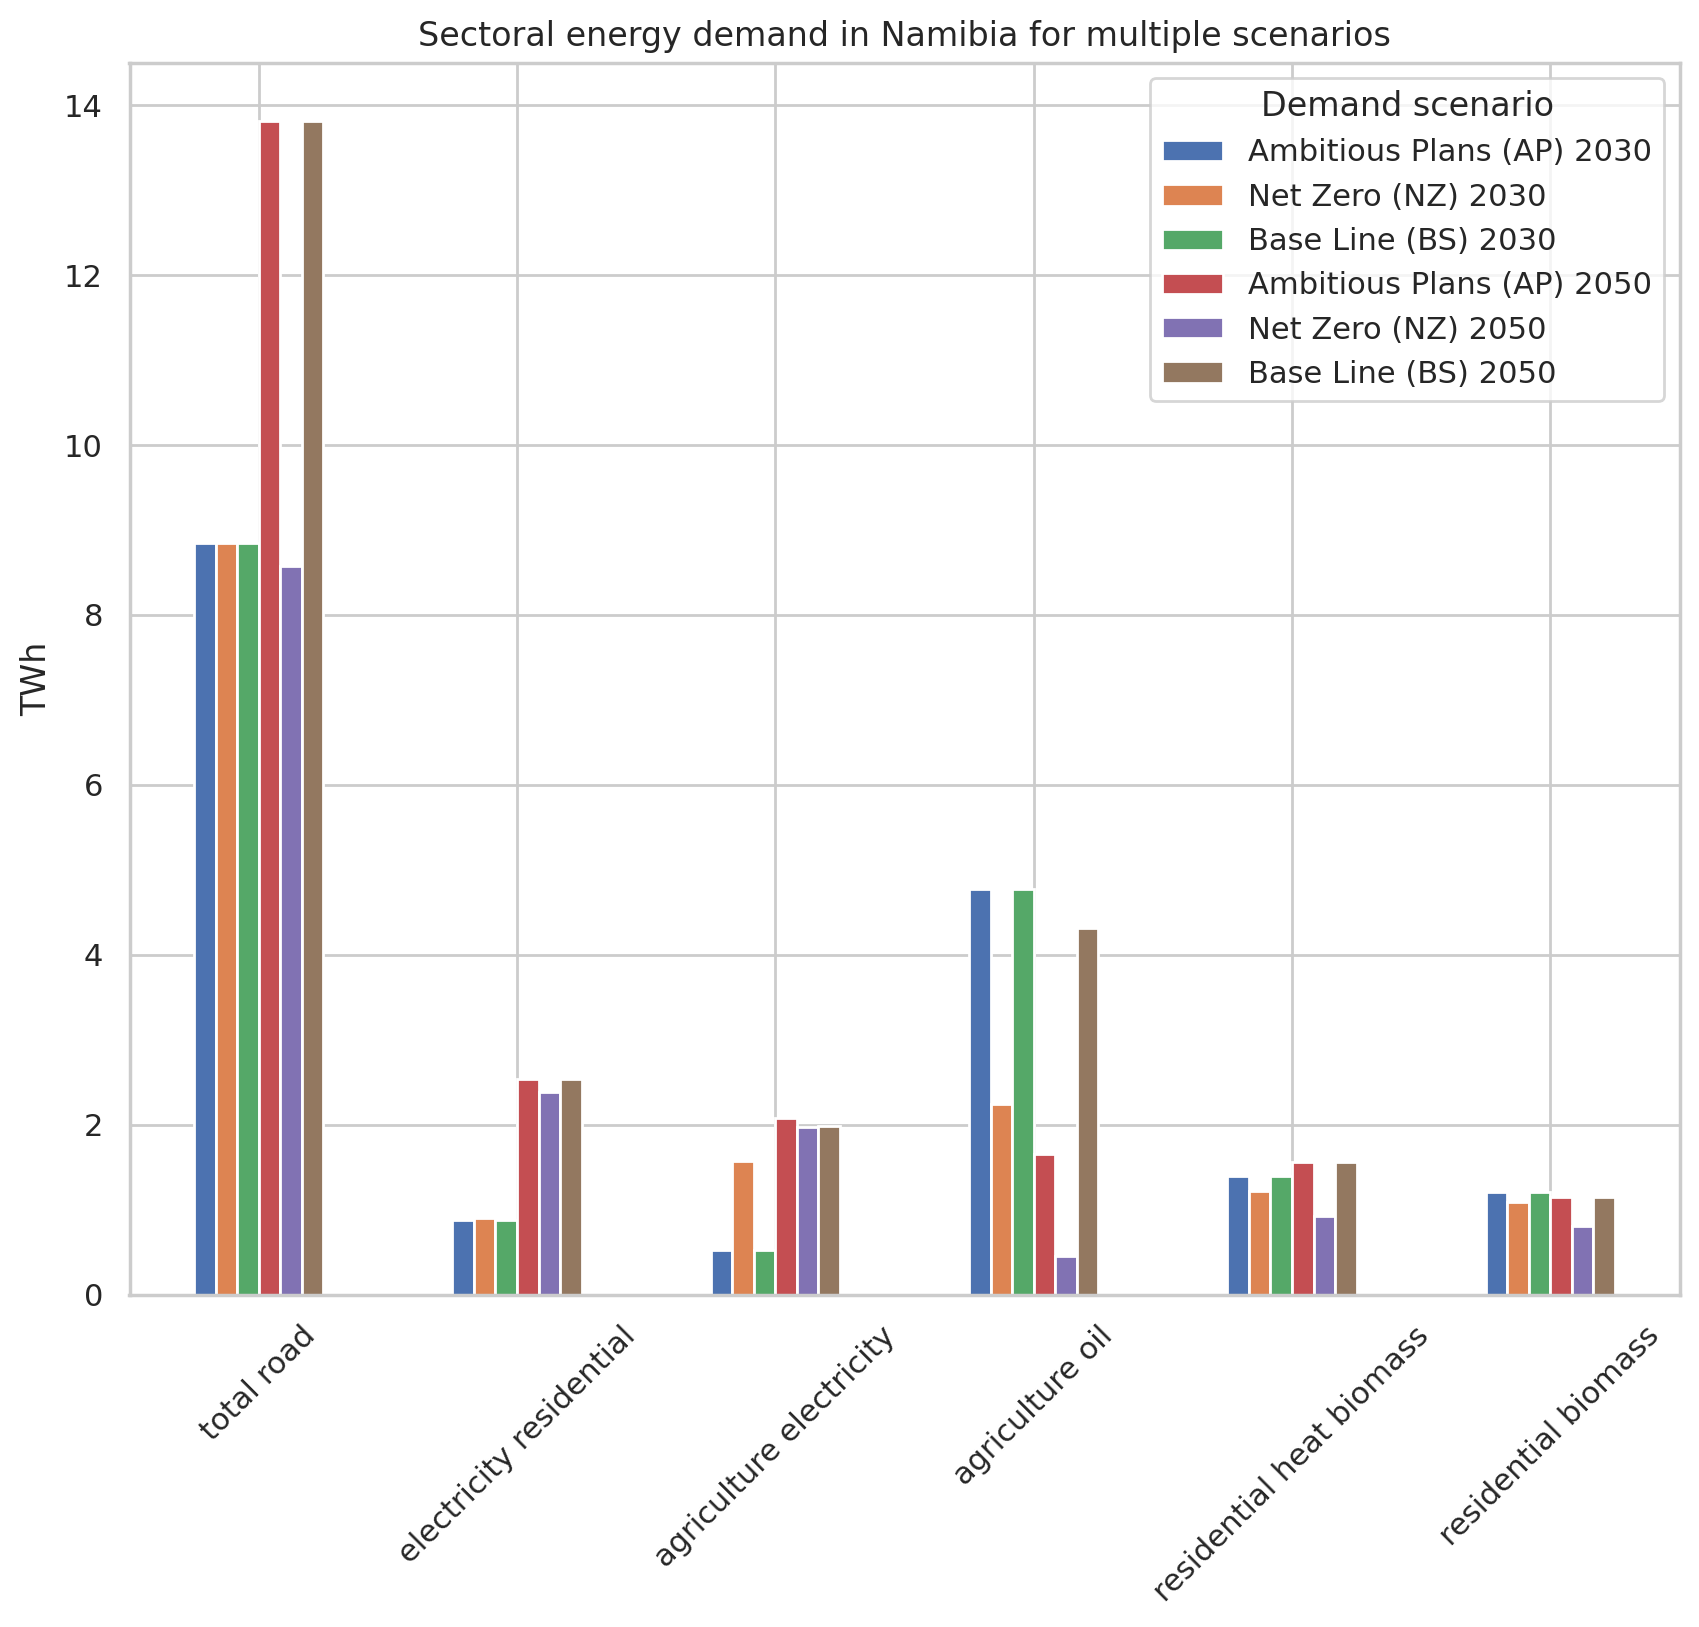

In [8]:
li = []
df = []

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 8)
fig.set_dpi(200)

df1 = pd.read_csv(etotals_ap, keep_default_na=False,na_values=[""])
df1["Demand scenario"] = "Ambitious Plans (AP) 2030"
li.append(df1)
df2 = pd.read_csv(etotals_nz, keep_default_na=False,na_values=[""])
df2["Demand scenario"] = "Net Zero (NZ) 2030"
li.append(df2)
df3 = pd.read_csv(etotals_bs, keep_default_na=False,na_values=[""])
df3["Demand scenario"] = "Base Line (BS) 2030"
li.append(df3)

#2050
df4 = pd.read_csv(etotals_ap_50, keep_default_na=False,na_values=[""])
df4["Demand scenario"] = "Ambitious Plans (AP) 2050"
li.append(df4)
df5 = pd.read_csv(etotals_nz_50, keep_default_na=False,na_values=[""])
df5["Demand scenario"] = "Net Zero (NZ) 2050"
li.append(df5)
df6 = pd.read_csv(etotals_bs_50, keep_default_na=False,na_values=[""])
df6["Demand scenario"] = "Base Line (BS) 2050"
li.append(df6)

df = pd.concat(li, axis=0, ignore_index=True)
df = df.drop(['country'], axis=1)
df = df.set_index('Demand scenario')
df = df.transpose()
df= df.loc[(df!=0).any(axis=1)]
df= df.dropna()
df= df.sort_values(by='Ambitious Plans (AP) 2050', ascending=False)
df= df.head(6)
df.plot(kind="bar", rot=45, title= "Sectoral energy demand in Namibia for multiple scenarios", ylabel = "TWh", ax=ax)
df